# Analysis on tweets using Python

> ### Decription
> In this tutorial, we will
> <br> Part 1: Extract twitter data using tweepy.Stream and store it in a csv file
> <br> Part 2: Get the data from csv file and analyze

## What do we need?
- __Tweepy__: Help us to access Twitter API to crawl data. Firstly, We must install that tweepy library by command 
<br> `pip install tweepy`
- __NumPy__: Help us in scientific computing with Python
- __Pandas__: Help us to handle and store data
- __Matplotlib__, __Seaborn__: Help us to draw attractive statistical graphics.
- __os__: Help us to get value from enviroment variables
<br> `pip install tweepy`
<br> _Note_: if any library is missing, we use `pip install <lib's name>` to install it

In [50]:
# General:
import os               # To get auth from environmant variables
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

- __Key and Token__:
 - Get the key and token to access the tweet database. [This video](https://www.youtube.com/watch?v=1p8veF-sIIo) will show us how to create an application and get its key and token.
 - For security, i will manually put these data into the variable enviroments.
 - __get_twitter_auth()__ function gets the key and token from envirment variables and uses it to gets and returns authentication

In [51]:
#Get consumer key, consumer secret, access token, access secret from Enviroment Variable to get authentication
def get_twitter_auth():
    try:
        # Key:
        CONSUMER_KEY    = os.environ.get('CONSUMER_KEY')
        CONSUMER_SECRET = os.environ.get('CONSUMER_SECRET')
        # Access:
        ACCESS_TOKEN  = os.environ.get('ACCESS_TOKEN')
        ACCESS_SECRET = os.environ.get('ACCESS_SECRET')
    except KeyError:
        sys.stderr.write("TWITTER_* Environment variables of Twitter authentication has not set\n")
        sys.exit(1)
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    return auth

## Part 1: Extract twitter data and write in a csv file
<br>
- Because the crawled data (text, created_at and source) is not in available format, we have to transform it into a avaiable format. To do this, we implement 4 additional functions to transform to before export file csv

In [52]:
#Library for the created_at variable
import datetime

#This function get month from the string and return a number representing the month
def get_month(m):
    if m == 'Jan': return 1
    if m == 'Feb': return 2
    if m == 'Mar': return 3
    if m == 'Apr': return 4
    if m == 'May': return 5
    if m == 'Jun': return 6
    if m == 'Jul': return 7
    if m == 'Aug': return 8
    if m == 'Sep': return 9
    if m == 'Oct': return 10
    if m == 'Nov': return 11
    if m == 'Dec': return 12

#Tranform string to datetime variable
def time_transform(time):
    t = datetime.datetime(int(time[26:]), get_month(time[4:7]), int(time[8:10]), int(time[11:13]), int(time[14:16]), int(time[17:19]))
    return t

#Only keep the content of a tweet
def text_clean(txt):
    if (txt[:4] != 'RT @'):
        return txt
    pos = txt.find(':') + 2
    return txt[pos:]

#Get the source from the data
def get_source(link):
    if link.find('android') != -1:
        return 'Android'
    if link.find('iphone') != -1:
        return 'Iphone'
    if link.find('ipad') != -1:
        return 'Ipad'
    if link.find('Twitter Web Client') != -1:
        return 'Twitter Web Client'
    return 'Other'

- Using Stream crawl data and function filter to get the tweets have a defined keyword. Firstlt, import necessrary library

In [53]:
#Libraybry for Stream
from tweepy import Stream
from tweepy.streaming import StreamListener
#Library for json to transfer crawled data to a dictionary to get access easier
from tweepy.utils import import_simplejson
json = import_simplejson()

- Instructor __init__() in class listener will initialize:
 - A variable num_tweet to count the number of tweets crawled
 - 2 numpy array created_at and text to store information of tweet
- We modify on_data function in listener class to do some tasks:
 - Use if to handle the number of crawled tweets
 - Use json to get the value by 2 keys created_at and text from raw_data
 - After crawling each 500 tweets, we have to make program sleep a few second to avoid IncompletedRead Error
 - Use if to ensure a raw data is a tweet and its language is endlish

In [54]:
#Input the maximum number of tweet crawled
limit = int(input("The maximum number of tweet crawled: "))
class listener(StreamListener):
    def __init__(self):
        self.num_tweet = 0
        self.created_at = np.chararray([])
        self.text = np.chararray([])
        self.source = np.chararray([])
    def on_data(self, raw_data, limit = limit):
        #Stop when get enough tweets
        if (self.num_tweet < limit):
            #Tansfer raw_data to get the value easier
            data = json.loads(raw_data)
            #Sleep to avoid IncompleteRead Error
            #if self.num_tweet % 500 == 0: time.sleep(2)
            #Ensure data is a tweet and its language is english
            if ('created_at' in data.keys() and data['lang'] == 'en'):
                #self.id = np.append(self.id,values=data['id'])
                #self.user = np.append(self.user,values=data['user'])
                self.created_at = np.append(self.created_at,values=data['created_at'])
                self.text = np.append(self.text,values=data['text'])
                self.source = np.append(self.source,values=data['source'])
                #self.favorite_count = np.append(self.favorite_count,values=data['favorite_count'])
                #self.retweet_count = np.append(self.retweet_count,values=data['retweet_count'])
                #self.lang = np.append(self.lang,values=data['user'])
                # self.place = np.append(self.place,values=(data['place'])
                # self.geo = np.append(self.geo,values=data['geo'])
                # self.coordinates = np.append(self.coordinates,values=data['coordinates'])
                self.num_tweet += 1
                print (self.num_tweet)
            return True
        else:
            #Transfer 3 arrays to the avaiable value
            new_text = np.chararray([])
            new_created = np.chararray([])
            new_source = np.chararray([])
            for text_ele in self.text[1:]:
                new_text = np.append(new_text, values = text_clean(text_ele))
                
            for time_ele in self.created_at[1:]:
                new_created = np.append(new_created, values = str(time_transform(time_ele)))
                
            for source_ele in self.source[1:]:
                new_source = np.append(new_source, values = get_source(source_ele))
            
            df = pd.DataFrame({"Content":new_text[1:], "Created Date":new_created[1:], "Source": new_source[1:]})
            df.to_csv('tweet_dataset.csv', index = False)
            return False

The maximum number of tweet crawled: 2000


- Use get_twitter_auth() function to get the authentication

In [55]:
auth = get_twitter_auth()

- Get the stream, use it to crawl data

In [57]:
twitterStream = Stream(auth, listener())
twitterStream.filter(track=['the','i','a', 'you', 'me', 'am', 'are', 'is', 'not', 'what', 'they', 'he', 'she', 'it'], async = True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000


## Part 2: Get the data from csv file and analyze

### 2.1 Get the tweet's dataset from csv file

In [58]:
main_file_path = 'tweet_dataset.csv'
data = pd.read_csv(main_file_path)

### 2.2 Analysis
- __The mean of all tweets'character length__

In [59]:
#Print the mean of the length of crawled tweets
length = np.array([])
for txt in data['Content']:
    length = np.append(length, values = len(txt))
print ('The average length of crawled tweets: ' + str(np.mean(length)))

The average length of crawled tweets: 90.9525


- __The number of tweets posted during each 30 seconds__

The mean of the number of tweets posted during 30 seconds: 1085.0


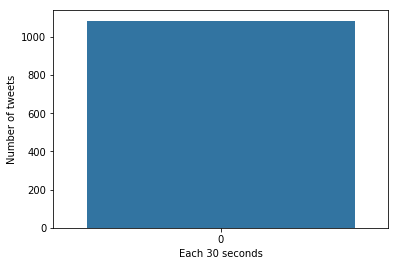

In [60]:
# We count the number of tweets per 30 seconds
# We obtain all parts of 30 seconds
times = []
for time in data['Created Date']:
    if time[14:16] not in times:
        times.append(time[14:16])
        times.append(time[14:16])  
#Inialize 0 to count number of tweets
count = np.zeros(len(times))
for time in data['Created Date']:
    for index in range(len(times)):
        if time[14:16] == times[index]:
            if int(time[17:]) <= 30: #From the 1st seconds to the 30th seconds of a minute
                count[index] += 1 
            else:#From the 31st seconds to the last seconds of a minute
                count[index + 1] += 1
            break

#Remove the results of a 30-second parts which are not collected completely
count = np.delete(count, len(count) - 1, 0)
if int(data['Created Date'][0][17:]) > 30:
    count = np.delete(count, 0, 0)
count = np.delete(count, 0, 0)

if (len(count) != 0):
    #There are enough tweets to calculate
    tweets_per_30s = pd.Series(count, name = 'Number of tweets')
    each_30s = pd.Series(list(range(len(count))), name = 'Each 30 seconds')
    sns.barplot(x = each_30s, y = tweets_per_30s)
    print ('The mean of the number of tweets posted during 30 seconds: ' + str(np.mean(count)))
else:
    print ('We do not have enough dataset to analyze! Please crawl more tweets')

- __The proportion of all sources that users use to post tweets____

Creation of content sources:
* Other
* Ipad
* Iphone
* Twitter Web Client
* Android


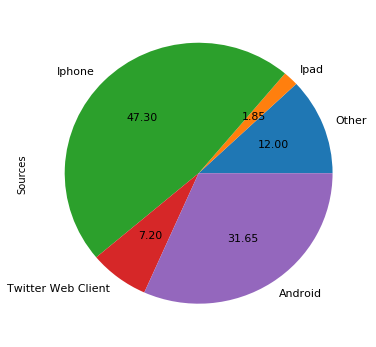

In [61]:
#Draw pie chart of sources
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))
    
percent = np.zeros(len(sources))
for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            break
  
percent /= len(data['Source'])

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));